In [1]:
# --------------------------------------------------------
# 
# Process and preliminary plots for Morris sensitivity
# analysis
# 
# --------------------------------------------------------
import glob
import os
import re

import matplotlib.pyplot as plt
import numpy as np
from SALib.sample import morris as morris_sampler
from SALib.analyze import morris as morris_analyzer
import pandas as pd
import pickle
import xarray as xr

# [ import the process functions ]
import batch_sa_process_fxns as bpf

## Generate batch xr dataset

In [2]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# set batch name 
batchname = "SAmorris715_v1"
resultpath = "/Users/tylerkukla/Documents/GitHub/PRYSM/psm/lake_v2/output/batch"
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# [ create (and save) the dataset ]
ds = bpf.batch_sa_workflow(
        resultpath,
        batchname,
        save_ds = False,
        savehere = '/Users/tylerkukla/Documents/GitHub/PRYSM/psm/lake_v2/output/batch/_SA-proc'
)
ds

<xarray.Dataset> Size: 42MB
Dimensions:                            (case_int: 716, doy: 12, depth_index: 200)
Coordinates:
  * doy                                (doy) float64 96B 15.0 45.0 ... 345.0
  * depth_index                        (depth_index) int32 800B 1 2 ... 199 200
  * case_int                           (case_int) int64 6kB 1 2 3 ... 715 716
Data variables: (12/42)
    cap47                              (case_int, doy, depth_index) float64 14MB ...
    depth_weights                      (case_int, doy, depth_index) float64 14MB ...
    temp_c_depth_wtd_mean              (case_int, doy) float64 69kB 5.624 ......
    cap47_depth_wtd_mean               (case_int, doy) float64 69kB 0.1591 .....
    T47C_depth_wtd_mean                (case_int, doy) float64 69kB 5.556 ......
    time_weights                       (case_int, doy) int32 34kB 1 1 1 ... 1 1
    ...                                 ...
    Delta_lst_mean                     (case_int) float64 6kB 1.503 1.68 ... 0.0
    Delta_lakeCol_mean_wtd             (case_int) float64 6kB -1.967 ... 0.0
    Delta_lst_per_Delta_air_wtd        (case_int) float64 6kB 0.7515 ... nan
    Delta_lst_per_Delta_air            (case_int) float64 6kB 0.7515 ... nan
    Delta_lakeCol_per_Delta_air        (case_int) float64 6kB -0.9834 ... nan
    lst_min_air_temp                   (case_int) float64 6kB 1.859 ... 2.356

## Read in SA inputs and compute Y vars

In [3]:
# --- read in the sa morris parameter array and problem dict 
SA_settings_path = "/Users/tylerkukla/Documents/GitHub/PRYSM/psm/lake_v2/output/batch/_SA-settings"
param_values = np.load(os.path.join(SA_settings_path, batchname, 'param_values.npy'))
problem = pd.read_pickle(os.path.join(SA_settings_path, batchname, 'problem.pkl'))

# ++++++++++++++++++++++++++++++++++++++++++
# decide plot type
plottype = "scatter"  # ["bar" | "scatter"]
# ++++++++++++++++++++++++++++++++++++++++++

# get the Y arrays
Y1_lst = ds['LST_unwtd_mean'].values[:len(param_values)]                    # lake surface temp
Y2_lbt = ds['lakebottom_temp_unwtd_mean'].values[:len(param_values)]        # lake bottom temp
Y3_coltemp = ds['T47C_MALT'].values[:len(param_values)]                     # column temp
Y4_lake_min_air = ds['lst_min_air_temp'].values[:len(param_values)]         # lake minus air temperature
Y5_anomRatio_surf = ds['Delta_lst_per_Delta_air'].values[:len(param_values)]     # lake anom (surface) over air anom
Y6_anomRatio_col = ds['Delta_lakeCol_per_Delta_air'].values[:len(param_values)] # lake anom (water column) over air anom

#### Compute and plot SA results for each Y 

                   mu   mu_star     sigma  mu_star_conf
depth_begin  1.745359  1.750385  1.986519      0.464591
salty_begin  0.740024  0.934131  1.538107      0.315669
cdrn        -4.388189  4.388189  2.457162      0.590836
eta          0.029578  0.665219  1.088065      0.233043
TSplus       5.974809  5.974809  2.298882      0.578165
RHplus       1.271672  1.271672  0.447776      0.110553
Ufac        -2.882407  2.882407  1.581560      0.406133
FSDSplus     2.447229  2.447229  0.980681      0.208901
FLDSplus     5.484483  5.484483  2.395113      0.510224
PSplus      -0.223014  0.238297  0.631714      0.132616


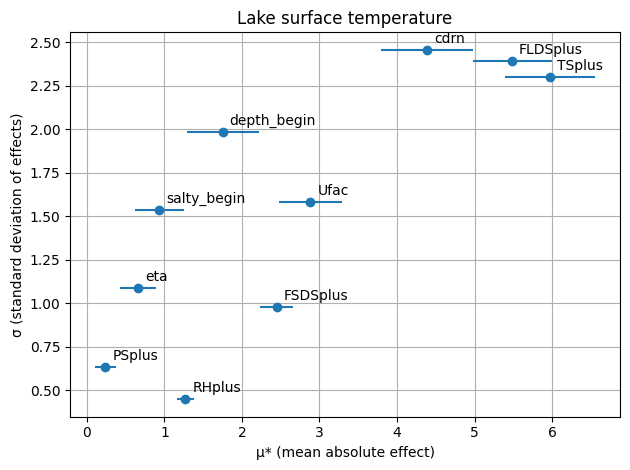

In [4]:
# [ analyze results ]
ptitle = "Lake surface temperature"
Si = morris_analyzer.analyze(problem, param_values, Y1_lst, conf_level=0.95, print_to_console=True)
if plottype == "bar":
    bpf.sa_quickplot_bar(Si, ptitle=ptitle)
else:
    bpf.sa_quickplot_scatter(Si, problem, ptitle=ptitle)

                   mu   mu_star     sigma  mu_star_conf
depth_begin  3.298951  5.529633  7.223519      1.376623
salty_begin  0.023150  2.284903  4.371888      0.930187
cdrn        -4.808546  4.808546  5.201218      1.230685
eta         -5.850841  5.850841  7.966794      2.042698
TSplus       5.573115  5.573115  4.411321      1.231425
RHplus       0.705958  0.706123  0.702035      0.158890
Ufac        -2.394886  2.407010  2.980615      0.732180
FSDSplus     3.038417  3.038417  2.195568      0.567465
FLDSplus     6.604472  6.604472  5.391761      1.271543
PSplus      -0.346495  0.361950  1.158573      0.284633


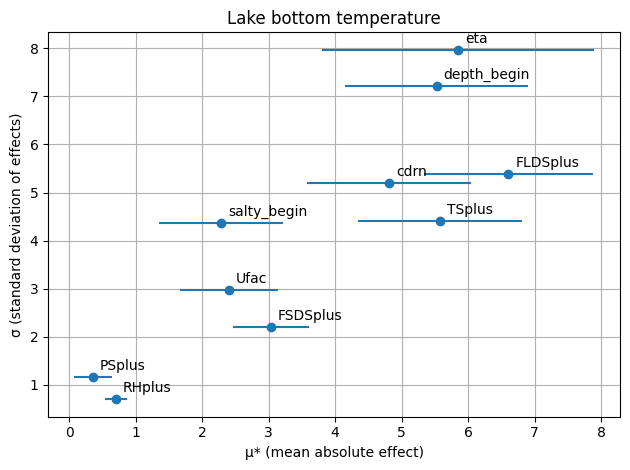

In [5]:
Si = morris_analyzer.analyze(problem, param_values, Y2_lbt, conf_level=0.95, print_to_console=True)
ptitle = "Lake bottom temperature"
if plottype == "bar":
    bpf.sa_quickplot_bar(Si, ptitle=ptitle)
else:
    bpf.sa_quickplot_scatter(Si, problem, ptitle=ptitle)

                   mu   mu_star     sigma  mu_star_conf
depth_begin  1.608029  4.770241  7.105134      1.199556
salty_begin  0.109115  2.129804  4.069064      0.834809
cdrn        -4.919769  4.919769  5.067692      1.505883
eta         -5.843738  5.843738  5.778249      1.421419
TSplus       5.676597  5.676597  4.180330      1.048408
RHplus       0.796535  0.796535  0.681521      0.145659
Ufac        -2.533513  2.533513  2.859910      0.608623
FSDSplus     3.022751  3.022751  2.114463      0.513461
FLDSplus     6.505296  6.505296  5.190596      1.291999
PSplus      -0.322669  0.335903  1.042533      0.251812


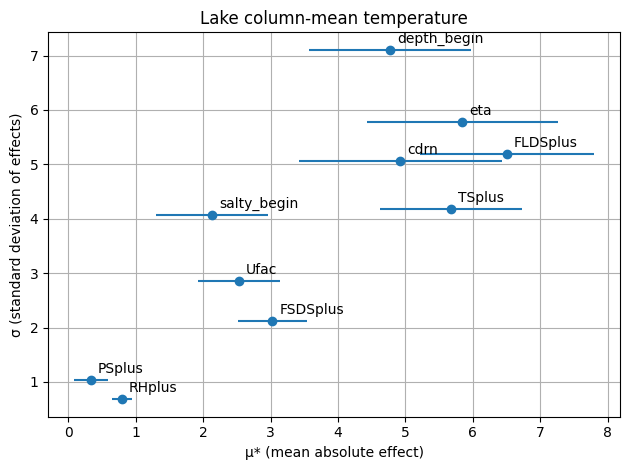

In [7]:
Si = morris_analyzer.analyze(problem, param_values, Y3_coltemp, conf_level=0.95, print_to_console=True)
ptitle = "Lake column-mean temperature"
if plottype == "bar":
    bpf.sa_quickplot_bar(Si, ptitle=ptitle)
else:
    bpf.sa_quickplot_scatter(Si, problem, ptitle=ptitle)

                   mu   mu_star     sigma  mu_star_conf
depth_begin  1.745359  1.750385  1.986519      0.501666
salty_begin  0.740024  0.934131  1.538107      0.308705
cdrn        -4.388189  4.388189  2.457162      0.556182
eta          0.029578  0.665219  1.088065      0.213268
TSplus      -6.025191  6.125262  2.298882      0.507600
RHplus       1.271672  1.271672  0.447776      0.114577
Ufac        -2.882407  2.882407  1.581560      0.409926
FSDSplus     2.447229  2.447229  0.980681      0.226308
FLDSplus     5.484483  5.484483  2.395113      0.575343
PSplus      -0.223014  0.238297  0.631714      0.146212


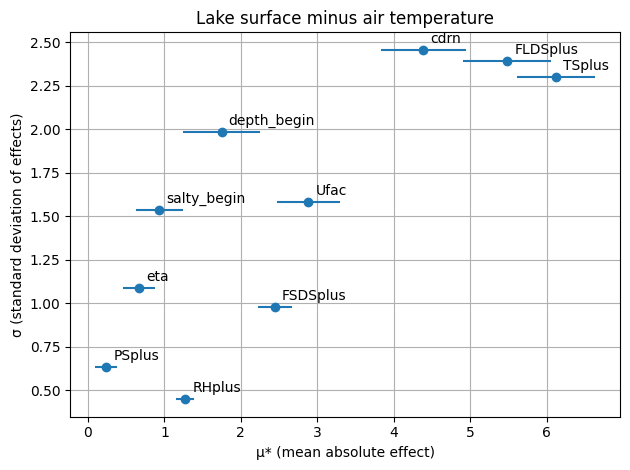

In [8]:
Si = morris_analyzer.analyze(problem, param_values, Y4_lake_min_air, conf_level=0.95, print_to_console=True)
ptitle = "Lake surface minus air temperature"
if plottype == "bar":
    bpf.sa_quickplot_bar(Si, ptitle=ptitle)
else:
    bpf.sa_quickplot_scatter(Si, problem, ptitle=ptitle)

                   mu   mu_star     sigma  mu_star_conf
depth_begin  0.188701  0.453921  0.747833      0.146083
salty_begin  0.041929  0.248159  0.500512      0.115812
cdrn         0.233812  1.081715  1.445940      0.228358
eta          0.029607  0.182234  0.304018      0.058664
TSplus       2.356898  3.500611  3.693714      0.578975
RHplus       0.068714  0.343497  0.404237      0.054968
Ufac         0.131613  0.722814  0.853358      0.109386
FSDSplus     0.033836  0.535343  0.693834      0.103181
FLDSplus     0.477351  1.510975  1.888426      0.326987
PSplus       0.032014  0.047699  0.111223      0.019624


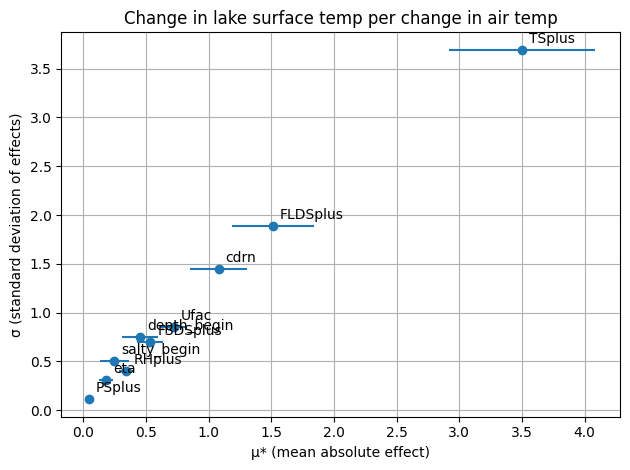

In [10]:
Si = morris_analyzer.analyze(problem, param_values, Y5_anomRatio_surf, conf_level=0.95, print_to_console=True)
ptitle = "Change in lake surface temp per change in air temp"
if plottype == "bar":
    bpf.sa_quickplot_bar(Si, ptitle=ptitle)
else:
    bpf.sa_quickplot_scatter(Si, problem, ptitle=ptitle)

                   mu   mu_star     sigma  mu_star_conf
depth_begin  0.191411  1.186044  1.900257      0.359061
salty_begin  0.076237  0.508228  1.011913      0.222169
cdrn         0.334498  1.222131  2.168961      0.467014
eta         -0.496329  1.815533  2.935943      0.588881
TSplus       1.747184  5.058216  5.834116      0.897688
RHplus       0.096315  0.218847  0.306611      0.050092
Ufac         0.183686  0.598789  0.816368      0.141029
FSDSplus     0.040972  0.662283  0.921395      0.153642
FLDSplus     0.577354  1.803128  2.685834      0.482292
PSplus       0.043129  0.065064  0.183699      0.041593


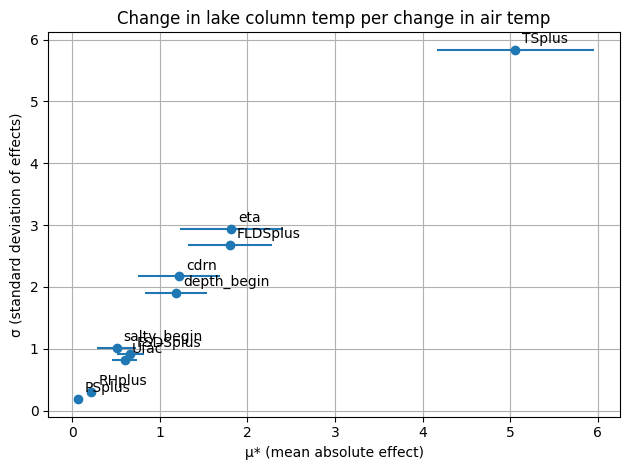

In [11]:
Si = morris_analyzer.analyze(problem, param_values, Y6_anomRatio_col, conf_level=0.95, print_to_console=True)
ptitle = "Change in lake column temp per change in air temp"
if plottype == "bar":
    bpf.sa_quickplot_bar(Si, ptitle=ptitle)
else:
    bpf.sa_quickplot_scatter(Si, problem, ptitle=ptitle)

---

## Plots for Emma

#### PLOT 1: 
Sensitivity to lake surface and lake bottom temperature

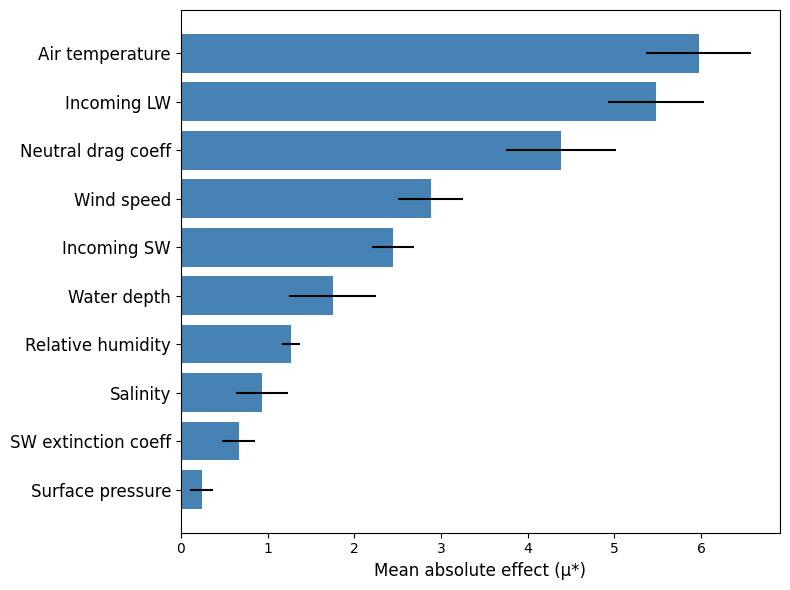

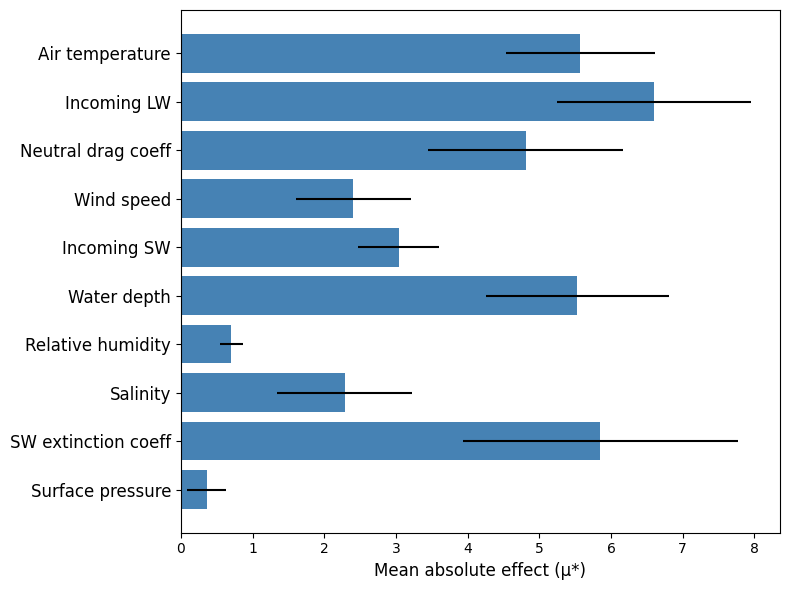

In [4]:
from matplotlib.gridspec import GridSpec
# [ surface and lake bottom bar plots ]
Sisurf = morris_analyzer.analyze(problem, param_values, Y1_lst, conf_level=0.95, print_to_console=False)
Sibott = morris_analyzer.analyze(problem, param_values, Y2_lbt, conf_level=0.95, print_to_console=False)
# --- order for lake bottom vars
bar_order = ["TSplus", "FLDSplus", "cdrn", "Ufac", "FSDSplus", "depth_begin", "RHplus", "salty_begin", "eta", "PSplus"]

# --- aesthetics
barcolor = "steelblue"
linecolor = "black"
ptitle = None
fs_xlab = 12
fs_ylab = 12
fs_xticks = 10

# --- plot 
bpf.sa_quickplot_bar(Sisurf, barcolor=barcolor, linecolor=linecolor, ptitle=ptitle, fs_ylab=fs_ylab, fs_xlab=fs_xlab, fs_xticks=fs_xticks)
bpf.sa_quickplot_bar(Sibott, barcolor=barcolor, linecolor=linecolor, ptitle=ptitle, fs_ylab=fs_ylab, fs_xlab=fs_xlab, fs_xticks=fs_xticks, bar_order=bar_order)


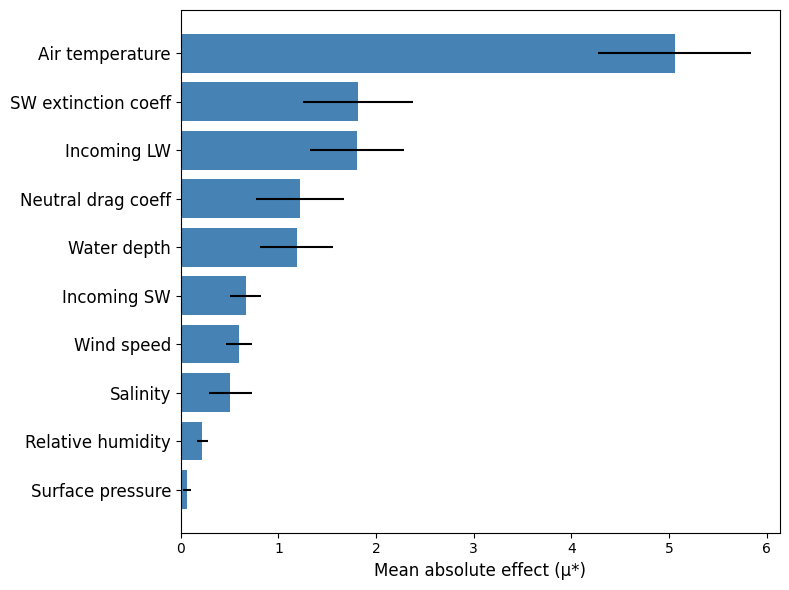

In [13]:
# [ surface and lake bottom bar plots ]
SiDratio = morris_analyzer.analyze(problem, param_values, Y6_anomRatio_col, conf_level=0.95, print_to_console=False)
ptitle = "Change in lake column temp per change in air temp"

# --- aesthetics
barcolor = "steelblue"
linecolor = "black"
ptitle = None
fs_xlab = 12
fs_ylab = 12
fs_xticks = 10

# --- plot 
bpf.sa_quickplot_bar(SiDratio, barcolor=barcolor, linecolor=linecolor, ptitle=ptitle, fs_ylab=fs_ylab, fs_xlab=fs_xlab, fs_xticks=fs_xticks)


#### Plot 2
Compre `mu` and `mu_star`

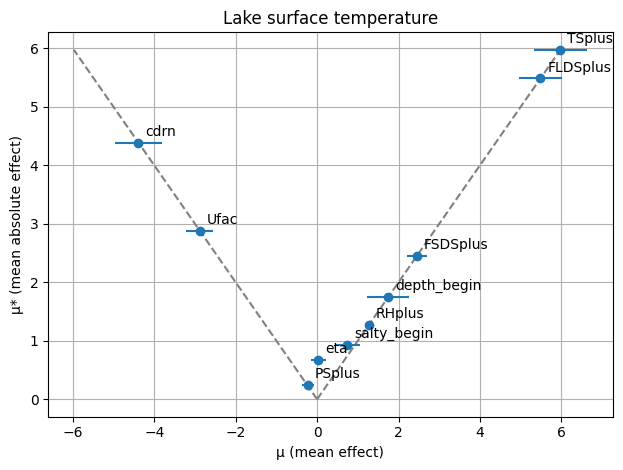

In [4]:
# [ mu vs mu star ]
# values near the 1:1 or -1:1 lines indicate that the variable has a strictly positive or negative
# effect on results
ptitle = "Lake surface temperature"
Si = morris_analyzer.analyze(problem, param_values, Y1_lst, conf_level=0.95, print_to_console=False)

bpf.sa_quickplot_scatter_compareMu(Si, problem, ptitle=ptitle)

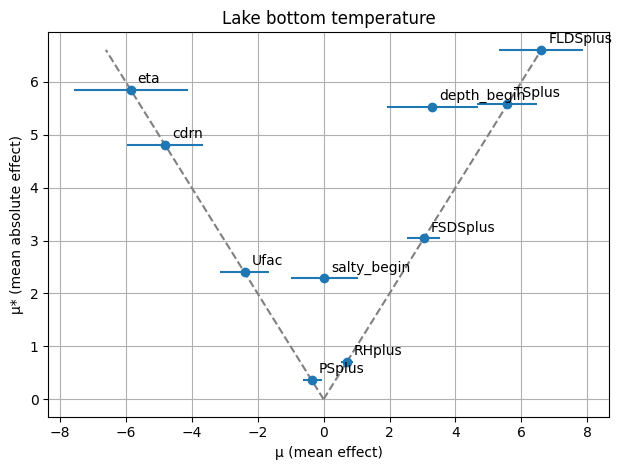

In [6]:
# [ mu vs mu star ]
# values near the 1:1 or -1:1 lines indicate that the variable has a strictly positive or negative
# effect on results
ptitle = "Lake bottom temperature"
Si = morris_analyzer.analyze(problem, param_values, Y2_lbt, conf_level=0.95, print_to_console=False)

bpf.sa_quickplot_scatter_compareMu(Si, problem, ptitle=ptitle)

---
## drawn out workflow for debugging


In [ ]:
# [ get the dir dict ]
dir_dict = bpf.create_output_dict(resultpath, f'{batchname}_')
# dir_dict

In [ ]:
# [ read and merge all .nc results ]
ds = bpf.read_and_merge_all_results(dir_dict)
ds

<xarray.Dataset> Size: 2MB
Dimensions:                            (case_int: 41, doy: 12, depth_index: 200)
Coordinates:
  * doy                                (doy) float64 96B 15.0 45.0 ... 345.0
  * depth_index                        (depth_index) int32 800B 1 2 ... 199 200
  * case_int                           (case_int) int64 328B 1 2 3 ... 39 40 41
Data variables: (12/16)
    cap47                              (case_int, doy, depth_index) float64 787kB ...
    depth_weights                      (case_int, doy, depth_index) float64 787kB ...
    temp_c_depth_wtd_mean              (case_int, doy) float64 4kB 4.482 ... ...
    cap47_depth_wtd_mean               (case_int, doy) float64 4kB 0.1592 ......
    T47C_depth_wtd_mean                (case_int, doy) float64 4kB 4.493 ... ...
    time_weights                       (case_int, doy) int32 2kB 1 1 1 ... 1 1 1
    ...                                 ...
    T47C_MAAT_HS12                     (case_int) float64 328B 13.05 ... 7.599
    Actual_MALST_PRYSM                 (case_int) float64 328B 14.88 ... 15.54
    Actual_MAAT_from_MALST_PRYSM_HS12  (case_int) float64 328B 13.01 ... 13.82
    depth_begin                        (case_int) int64 328B 10 10 10 ... 10 100
    alb_slush                          (case_int) float64 328B 0.4667 ... 0.4
    alb_snow                           (case_int) float64 328B 0.6333 ... 0.7

In [ ]:
# [ add lake surface and bottom temp ]
ds = bpf.get_unwtd_lake_topbottom_temps(ds)

# [ add air temp ]
ds = bpf.add_air_temperature_to_ds(
            ds,
            dir_dict,
    )

In [ ]:
# [ add extra temperature calculations ]
ds = bpf.add_extra_airtemp_vars(ds)

In [ ]:
# --------